In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [54]:
df = pd.read_csv("virat.csv")

In [55]:
df.Runs.sample(10)

86       0
76      43
121    117
125      9
130      8
33      34
25       0
89      19
98      40
47     107
Name: Runs, dtype: object

#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [56]:
## Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


In [57]:
df.Runs = df.Runs.apply(lambda x : x[:-1] if x[-1] == "*" else x  )

In [58]:
df.Runs = df.Runs.astype("int32")

In [59]:
df.Runs.describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

In [60]:
df['Runs'].describe(percentiles = [0.25,0.5,1]) 

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
100%     154.000000
max      154.000000
Name: Runs, dtype: float64

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


<AxesSubplot:>

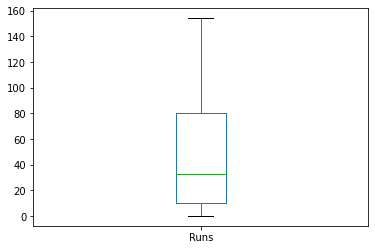

In [61]:
df.Runs.plot.box()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [27]:
import datetime as dt

In [40]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),2008-08-24,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),2008-08-27,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),2008-08-29,2008


In [46]:
year_df = df.groupby(by='year')
run_avg = year_df[['Runs','Inns']].sum()
run_avg.Runs/run_avg.Inns

year
2008    22.714286
2009    25.555556
2010    27.923077
2011    26.571429
2012    26.117647
2013    30.555556
2014    35.535714
2015    20.266667
2016    46.187500
2017    37.000000
dtype: float64

In [47]:
year_df.Runs.max()

year
2008     54
2009    107
2010    118
2011    117
2012    128
2013    115
2014    139
2015    138
2016    154
2017    122
Name: Runs, dtype: int32

In [ ]:
year_df.Inns.sum()

In [37]:
df['Start Date'] = pd.to_datetime(df["Start Date"])

In [38]:
df['year'] = df["Start Date"].dt.year

In [39]:
df.year

0      2008
1      2008
2      2008
3      2008
4      2008
       ... 
127    2016
128    2016
129    2017
130    2017
131    2017
Name: year, Length: 132, dtype: int64

In [49]:
df.year.value_counts()

2011    31
2013    23
2014    17
2010    16
2012    11
2015    10
2016    10
2009     6
2008     5
2017     3
Name: year, dtype: int64

In [52]:
df.pivot_table(columns=['year'], values =['Runs'], aggfunc=['mean','max'])

mean                                                                  \
year  2008       2009    2010  2011       2012       2013       2014  2015   
Runs  31.8  38.333333  45.375  42.0  40.363636  47.826087  58.529412  30.4   

                       max                                               
year  2016       2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017  
Runs  73.9  61.666667   54  107  118  117  128  115  139  138  154  122

In [62]:
df['Start Date']= df['Start Date'].apply(lambda x: (x[-2:]))

In [63]:
df['Start Date'].value_counts()

11    31
13    23
14    17
10    16
12    11
15    10
16    10
09     6
08     5
17     3
Name: Start Date, dtype: int64

In [65]:
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.mean)
# pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.max)

Start Date,08,09,10,11,12,13,14,15,16,17
Runs,31.8,38.333333,45.375,42.0,40.363636,47.826087,58.529412,30.4,73.9,61.666667


In [66]:
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.max)

Start Date,08,09,10,11,12,13,14,15,16,17
Runs,54,107,118,117,128,115,139,138,154,122


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [70]:
df.Mins.dtype

dtype('O')

In [75]:
df.Mins.replace(['-'],['0'],inplace=True)

In [76]:
df['Mins'] = df.Mins.astype("int32")

<AxesSubplot:ylabel='Frequency'>

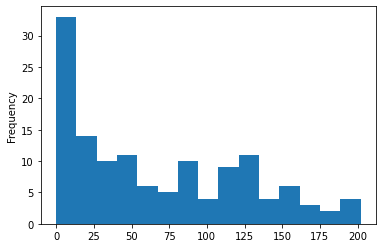

In [78]:
df.Mins.plot.hist(bins=15)